In [24]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Organised TL/Final SER_STRUToriginal/serstrut'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Organised TL/Final SER_STRUToriginal/serstrut


In [25]:
import lib_tree
import ser
import strut
import copy
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score

## 2 classes

In [54]:
Final_Data_S1= pd.read_csv("final_H358.csv")
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([ 2.0, 3.0,4.0])].index, 'labels']=1.0
ys = Final_Data_S1.labels
Xs= Final_Data_S1.drop(['Time', 'labels'], axis=1)

In [66]:
train= pd.read_csv("train_data.csv")
test= pd.read_csv("test_data.csv")
train.loc[train[train.labels.isin([ 2.0])].index, 'labels']=1.0
test.loc[test[test.labels.isin([ 2.0])].index, 'labels']=1.0
yt = train.labels
Xt= train.drop([ 'labels'], axis=1)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(Xt, yt, test_size=0.9, stratify=yt,  random_state = 42)
X_train_t = X_train_t.to_numpy()
y_train_t= y_train_t.to_numpy()
y_test_t = test.labels
X_test_t = test.drop([ 'labels'], axis=1)

In [70]:
N_EST = 3
MAX=3
rf_or = RandomForestClassifier(n_estimators=N_EST, max_depth=MAX)
rf_or.fit(Xs, ys)
rftl= ser.SER_RF(rf_or, X_train_t, y_train_t, original_ser=True)
rf_strut = strut.STRUT_RF(rf_or, X_train_t, y_train_t)

In [71]:
ypredMIX = np.empty(len(y_test_t))

for p in range(len(y_test_t)):
    PSER = ser.forest_posterior(rftl, np.array(X_test_t.iloc[p]).reshape(1, -1)).mean(axis=0)
    PSTRUT = strut.forest_posterior(rf_strut, np.array(X_test_t.iloc[p]).reshape(1, -1)).mean(axis=0)
    PMIX = np.array((PSER,PSTRUT))
    ypredMIX[p] = np.argmax(PMIX.mean(axis=0))


In [72]:
mix_accuracy = accuracy_score(y_test_t, ypredMIX)
print('mix_accuracy:', mix_accuracy)

mix_accuracy: 0.8913857677902621


In [73]:
from sklearn.metrics import precision_recall_fscore_support as score1
precision, recall, fscore, support = score1(y_test_t, ypredMIX)
roc = roc_auc_score(y_test_t, ypredMIX)
f1_weighted = f1_score( y_test_t, ypredMIX, average='weighted')
print('weighted f1 score:', f1_weighted)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('roc auc:', roc)
print('support:', support)
cm = confusion_matrix(y_test_t, ypredMIX)
print("Confusion Matrix:")
print(cm)

weighted f1 score: 0.8859347865125526
precision: [0.88679245 0.90909091]
recall; [0.97409326 0.67567568]
fscore: [0.92839506 0.7751938 ]
roc auc: 0.8248844699621901
support: [193  74]
Confusion Matrix:
[[188   5]
 [ 24  50]]


## 3 classes

In [ ]:
Final_Data_S1= pd.read_csv("final_H358.csv")

Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([ 3.0,4.0])].index, 'labels']=2.0

ys = Final_Data_S1.labels
Xs= Final_Data_S1.drop(['Time', 'labels'], axis=1)

In [ ]:
train= pd.read_csv("train_data.csv")
test= pd.read_csv("test_data.csv")

yt = train.labels
Xt= train.drop([ 'labels'], axis=1)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(Xt, yt, test_size=0.9, stratify=yt,  random_state = 42)
X_train_t = X_train_t.to_numpy()
y_train_t= y_train_t.to_numpy()
y_test_t = test.labels
X_test_t = test.drop([ 'labels'], axis=1)

In [ ]:
N_EST = 3
MAX=3
rf_or = RandomForestClassifier(n_estimators=N_EST, max_depth=MAX)
rf_or.fit(Xs, ys)
rftl= ser.SER_RF(rf_or, X_train_t, y_train_t, original_ser=True)
rf_strut = strut.STRUT_RF(rf_or, X_train_t, y_train_t)

In [ ]:
ypredMIX = np.empty(len(y_test_t))

for p in range(len(y_test_t)):
    PSER = ser.forest_posterior(rftl, np.array(X_test_t.iloc[p]).reshape(1, -1)).mean(axis=0)
    PSTRUT = strut.forest_posterior(rf_strut, np.array(X_test_t.iloc[p]).reshape(1, -1)).mean(axis=0)
    PMIX = np.array((PSER,PSTRUT))
    ypredMIX[p] = np.argmax(PMIX.mean(axis=0))

In [ ]:
mix_accuracy = accuracy_score(y_test_t, ypredMIX)
print('mix_accuracy:', mix_accuracy)
from sklearn.metrics import precision_recall_fscore_support as score1
precision, recall, fscore, support = score1(y_test_t, ypredMIX)
f1_weighted = f1_score( y_test_t, ypredMIX, average='weighted')
print('weighted f1 score:', f1_weighted)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, ypredMIX)
print("Confusion Matrix:")
print(cm)

mix_accuracy: 0.8426966292134831
weighted f1 score: 0.826311354401242
precision: [0.88785047 0.60465116 0.9       ]
recall; [0.98445596 0.54166667 0.34615385]
fscore: [0.93366093 0.57142857 0.5       ]
support: [193  48  26]
Confusion Matrix:
[[190   3   0]
 [ 21  26   1]
 [  3  14   9]]


Micro-averaged One-vs-Rest ROC AUC score:
0.8820
Macro-averaged One-vs-Rest ROC AUC score:
0.7444


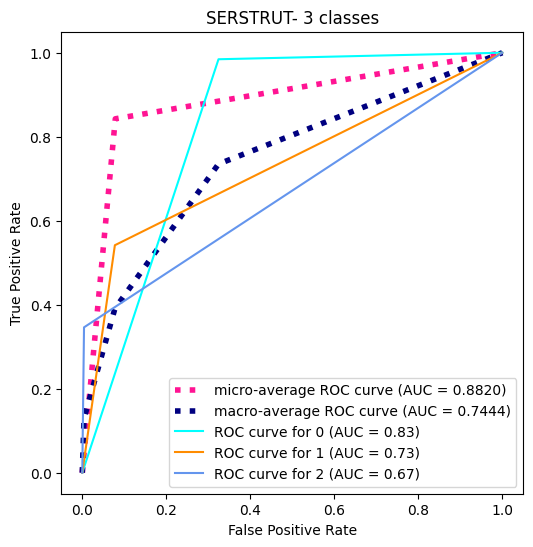

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
label_binarizer = LabelBinarizer().fit(y_test_t)
y_onehot_test = label_binarizer.transform(y_test_t)
y_onehot_test.shape  # (n_samples, n_classes)
label_binarizer.transform([0])

import matplotlib.pyplot as plt

y_pred_onehot = label_binarizer.transform(ypredMIX)



from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))


from sklearn.metrics import auc, roc_curve
n_classes = 3
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_pred_onehot.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.4f}")
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.4f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)


for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_pred_onehot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.4f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.4f}")
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred_onehot[:, class_id],
        name=f"ROC curve for {class_id}",
        color=color,
        ax=ax,
        #plot_chance_level=(class_id == 2),
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SERSTRUT- 3 classes")
plt.legend()
plt.show()